In [1]:
from my_cvae_model import *
from typing import List, Dict
import math

cuda


In [2]:
model = CVAE()
prior = PriorNet(y_dim=1, latent_dim=64)
print(device)
save_path = "model_weights_dmodel256.pth"
state_dict = torch.load(save_path)
model.load_state_dict(state_dict)

save_path = "model_weights_prior.pth"
state_dict = torch.load(save_path)
prior.load_state_dict(state_dict)

model.cuda()
prior.cuda()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

vocab = {'(': 0, ')': 1, '=': 2, '[O;!R;C]': 3, '[CH3;!R;C]': 4, '[CH2;!R;CN]': 5, '[CH2;!R;CC]': 6, '[CH2;!R;CO]': 7, '[*;!R;C]': 8, '[SOS]': 9, '[EOS]': 10, '[O;!R;CC]': 11, '[NH;!R;CC]': 12, '[*;!R;O]': 13, '[O;!R;*C]': 14, '[C;!R;*OO]': 15, '[CH;!R;CCO]': 16, '[CH;!R;CCN]': 17, '[C;!R;CNO]': 18, '[N;!R;CCC]': 19, '[C;!R;*NO]': 20, '[*;!R;N]': 21, '[NH;!R;*C]': 22, '[CH3;!R;N]': 23, '[CH;!R;CCC]': 24, '[C;!R;CCCO]': 25, '[CH;!R;CC]': 26, '[F;!R;C]': 27, '[CH2;!R;C]': 28, '[C;!R;COO]': 29, '[CH3;!R;O]': 30, '[C;!R;CCCN]': 31, '#': 32, '[C;!R;CCCC]': 33, '[CH2;!R;CS]': 34, '[C;!R;CC]': 35, '[OH;!R;C]': 36, '[S;!R;CC]': 37, '[N;!R;C]': 38, '[C;!R;CN]': 39, '[CH;!R;C]': 40, '[C;!R;CCC]': 41, '[NH2;!R;C]': 42, '[CH;!R;CFF]': 43, '[O;!R;S]': 44, '[O;!R;CN]': 45, '[CH;!R;CCS]': 46, '[CH2;!R;CF]': 47, '[CH3;!R;S]': 48, '[C;!R;CCO]': 49, '[NH;!R;CO]': 50, '[C;!R;NNO]': 51, '[CH2;!R;*C]': 52, '[C;!R;CFFF]': 53, '[C;!R;CCFF]': 54, '[C;!R;NOO]': 55, '[C;!R;OOO]': 56, '[S;!R;CCOO]': 57, '[CH3;!R;Si]': 58, '[C;!R;NNS]': 59, '[S;!R;C]': 60, '[Cl;!R;C]': 61, '[NH;!R;C]': 62, '[OH;!R;P]': 63, '1': 64, '[C;!R;CNN]': 65, '[CH;!R;CN]': 66, '[SH;!R;C]': 67, '[CH;!R;CCF]': 68, '[O;!R;P]': 69, '[CH2;!R;NO]': 70, '[C;!R;CCCl]': 71, '[CH;!R;NN]': 72, '[CH2;!R;CSi]': 73, '[O;R;CC]': 74, '[cH;R;CC]': 75, '[c;R;CCO]': 76, '[CH;!R;CO]': 77, '[Si;!R;CCCC]': 78, '[NH;!R;CS]': 79, '[N;!R;CN]': 80, '[C;!R;CCN]': 81, '[C;!R;CCNN]': 82, '[N;!R;CCO]': 83, '[CH;!R;COO]': 84, '[P;!R;COOO]': 85, '[N;!R;CO]': 86, '[CH;!R;CCl]': 87, '[S;!R;CNOO]': 88, '[C;!R;CCCF]': 89, '[CH2;!R;NSi]': 90, '[C;!R;CCOO]': 91, '[NH2;!R;O]': 92, '[C;!R;CCF]': 93, '[CH;R;CCO]': 94, '[CH2;R;CO]': 95, '[C;R;OOO]': 96, '[O;!R;CS]': 97, '[NH;!R;CN]': 98, '[OH;!R;N]': 99, '[C;!R;NNN]': 100, '[N;!R;CS]': 101, '[S;!R;CCNO]': 102, '[N;!R;CCN]': 103, '[S;!R;CCO]': 104, '[OH;!R;S]': 105, '[CH;!R;CNP]': 106, '[CH2;!R;CP]': 107, '[CH;!R;CS]': 108, '[S;!R;NNOO]': 109, '[NH2;!R;S]': 110, '[N;!R;CC]': 111, '[NH2;!R;N]': 112, '[Si;!R;*CCC]': 113, '[*;!R;Si]': 114, '2': 115, '[CH;R;*CN]': 116, '[N;R;CCC]': 117, '[C;!R;*CO]': 118, '[S;!R;COOO]': 119, '[O;!R;CP]': 120, '[C;!R;CCCS]': 121, '[C;!R;NN]': 122, '[CH2;!R;OO]': 123, '[CH2;!R;NS]': 124, '[S;!R;COOS]': 125, '[S;!R;S]': 126, 'N': 127, '[P;!R;OOOO]': 128, '[CH;!R;CNO]': 129, '[CH;!R;FFO]': 130, '[CH;!R;CNN]': 131, '[C;!R;CSi]': 132, '[c;R;CCC]': 133, '[c;R;*CC]': 134, '[C;R;NNO]': 135, '[S;!R;OOO]': 136, '[O;!R;*S]': 137, '[CH2;!R;SS]': 138, '[CH2;!R;OP]': 139, '[C;!R;CFFO]': 140, '[C;!R;NSS]': 141, '[CH;!R;COP]': 142, '[CH;!R;CNS]': 143, '[C;!R;CCCCl]': 144, '[CH;!R;*CC]': 145, '[CH2;!R;NN]': 146, '[N;!R;CCS]': 147, '[PH;!R;CCO]': 148, '[P;!R;CCOO]': 149, '[C;!R;COS]': 150, '[C;!R;CCClCl]': 151, '[C;!R;OSS]': 152, '[CH2;!R;OSi]': 153, '[C;!R;CCFO]': 154, '[C;!R;CClCl]': 155, '[[N+]': 156, 'O': 157, '[[O-]': 158, '[N;!R;NO]': 159, '[SH;!R;O]': 160, '[CH;!R;NO]': 161, '[C;!R;CCNO]': 162, '[CH;!R;NNN]': 163, '[S;!R;OOOO]': 164, '[C;!R;CCOP]': 165, '[PAD]': 166}
index_to_token = {idx: token for token, idx in vocab.items()}
print(index_to_token)

cuda
{0: '(', 1: ')', 2: '=', 3: '[O;!R;C]', 4: '[CH3;!R;C]', 5: '[CH2;!R;CN]', 6: '[CH2;!R;CC]', 7: '[CH2;!R;CO]', 8: '[*;!R;C]', 9: '[SOS]', 10: '[EOS]', 11: '[O;!R;CC]', 12: '[NH;!R;CC]', 13: '[*;!R;O]', 14: '[O;!R;*C]', 15: '[C;!R;*OO]', 16: '[CH;!R;CCO]', 17: '[CH;!R;CCN]', 18: '[C;!R;CNO]', 19: '[N;!R;CCC]', 20: '[C;!R;*NO]', 21: '[*;!R;N]', 22: '[NH;!R;*C]', 23: '[CH3;!R;N]', 24: '[CH;!R;CCC]', 25: '[C;!R;CCCO]', 26: '[CH;!R;CC]', 27: '[F;!R;C]', 28: '[CH2;!R;C]', 29: '[C;!R;COO]', 30: '[CH3;!R;O]', 31: '[C;!R;CCCN]', 32: '#', 33: '[C;!R;CCCC]', 34: '[CH2;!R;CS]', 35: '[C;!R;CC]', 36: '[OH;!R;C]', 37: '[S;!R;CC]', 38: '[N;!R;C]', 39: '[C;!R;CN]', 40: '[CH;!R;C]', 41: '[C;!R;CCC]', 42: '[NH2;!R;C]', 43: '[CH;!R;CFF]', 44: '[O;!R;S]', 45: '[O;!R;CN]', 46: '[CH;!R;CCS]', 47: '[CH2;!R;CF]', 48: '[CH3;!R;S]', 49: '[C;!R;CCO]', 50: '[NH;!R;CO]', 51: '[C;!R;NNO]', 52: '[CH2;!R;*C]', 53: '[C;!R;CFFF]', 54: '[C;!R;CCFF]', 55: '[C;!R;NOO]', 56: '[C;!R;OOO]', 57: '[S;!R;CCOO]', 58: '[CH3;!

In [3]:
def reverse_one_hot_encoding(one_hot_tensor, vocab):
    # 인덱스 → 토큰 매핑 생성
    index_to_token = {idx: token for token, idx in vocab.items()}

    # 복원된 토큰 시퀀스를 저장할 리스트
    original_tokens_list = []

    # GPU 텐서면 CPU로
    if one_hot_tensor.is_cuda:
        one_hot_tensor = one_hot_tensor.cpu()

    # one-hot → argmax (인덱스 시퀀스)
    try:
        _ = one_hot_tensor.shape[1]
        one_hot_tensor = torch.argmax(one_hot_tensor, dim=-1)
    except:
        pass  # 이미 1D 라면 그대로 둠

    # “값이 166인” 위치만 추출
    idx_166 = torch.nonzero(one_hot_tensor == 166, as_tuple=True)[0]

    # 만약 166 토큰이 하나도 없으면 전체 길이 사용
    end_pos = idx_166[0].item() if len(idx_166) > 0 else one_hot_tensor.size(0)

    # 0부터 end_pos 직전까지 토큰 복원
    for i in range(end_pos):
        token_idx = one_hot_tensor[i].item()
        original_tokens_list.append(index_to_token.get(token_idx, "<UNK>"))

    return original_tokens_list


In [4]:
def build_grammar_mask(prefix_tokens: List[int],
                       idx2token: Dict[int,str],
                       vocab_size: int,
                       max_stars: int = 2) -> torch.BoolTensor:
    """
    prefix_tokens: 이미 생성된 토큰 ID 리스트
    idx2token: ID → 토큰 문자열 매핑 (예: 0:'C', 1:'(', 2:')', 3:'*', …)
    vocab_size: 어휘 크기
    max_stars: '*' 토큰을 허용할 최대 개수
    반환: mask tensor of shape [vocab_size], True는 허용, False는 금지
    """
    # 1) 상태 계산
    paren_depth = 0
    star_count  = 0
    for tid in prefix_tokens:
        tok = idx2token[tid]
        if tok == '(':
            paren_depth += 1
        elif tok == ')':
            paren_depth = max(0, paren_depth - 1)
        elif tok == '*':
            star_count += 1

    mask = torch.ones(vocab_size, dtype=torch.bool)

    # 2) 괄호 관련 제약
    # '('은 항상 허용, ')'은 열린 만큼만
    for idx, tok in idx2token.items():
        if tok == ')':
            # 더 닫을 괄호가 없으면 금지
            if paren_depth == 0:
                mask[idx] = False

    # 3) '*' 관련 제약
    # 이미 max_stars개를 썼으면 더 못 쓰도록
    star_idx = {i for i,t in idx2token.items() if t=='*'}
    if star_count >= max_stars:
        for idx in star_idx:
            mask[idx] = False

    # 4) 기타: prefix 끝이 '['이면 ']'만 올 수 있게
    last_tok = idx2token[prefix_tokens[-1]]
    if last_tok == '[':
        # '[' 다음에는 원자 기호나 부호 등이 올 수 있지만, 여기선 예시로 ']'만 허용
        for idx, tok in idx2token.items():
            if tok != ']':
                mask[idx] = False
    # 5) 문장 종료 시에도 열린 괄호·별 개수 맞춰야
    #    (생성 끝나고 EOS를 뽑을 때만 허용)
    #    이 부분은 decoding 루프 내에서 pred_token==end_token인 경우에만 예외 처리

    return mask


In [5]:

os.environ["PYTORCH_ENABLE_FLASH_ATTENTION"] = "0"

import torch
torch.backends.cuda.enable_flash_sdp(False)
torch.backends.cuda.enable_mem_efficient_sdp(False)
print(torch.backends.cudnn.deterministic)



# 이미 학습된 Transformer 기반 CVAE 모델을 불러왔다고 가정합니다.
# model.encoder와 model.decoder로 인코딩/디코딩이 가능

model.eval()
prior.eval()
model.decoder.cuda()
prior.cuda()
model.cuda()

# 조건 정보 및 입력 문장의 형태에 맞게 설정 (예: 조건이 화학적 특성 벡터라면 해당 텐서)
condition = torch.tensor([21.0, -0.4, 1.4]).unsqueeze(-1).to(device)  # 조건 벡터, shape: [batch_size, condition_dim]
condition = condition.repeat(1024, 90, 1)[:, :268, :]
mean, var = prior(condition)
z = model.reparameterize(mean, var)
print(z.shape)
condition = model.input_embedding_p(condition)
condition = model.pos_enc(condition)
z_z = model.crossattn(z, condition, condition)

# 입력 분자에 해당하는 데이터를 인코더에 넣어 latent 벡터 추출 (만약 재구성을 위해 사용했다면)
# X_input: 토큰 시퀀스로 표현한 분자. 만약 새롭게 생성하는 경우엔 인코더를 사용하지 않을 수도 있습니다.

latent_dim = 64  # latent 공간 차원
# 배치 내 한 개 혹은 여러 개 샘플 생성

z_prime = model.ff(z_z)
print(z_prime.shape)


import torch
import torch.nn.functional as F

def generate_batch_sequence(
    decoder,
    z,
    max_length=265,
    start_token=None,
    end_token=None,
    fixed_seq_len=None,
    pad_token=None,
    device='cuda'
):
    """
    Batch-aware autoregressive generation without temperature scaling,
    top-k / top-p filtering, or fallback re-normalisation.

    Args
    ----
    decoder : nn.Module
        Autoregressive Transformer decoder.
    z : torch.Tensor
        Latent tensor of shape [B, seq_len, embed_dim].
    max_length : int
        Maximum number of tokens to generate (inclusive of <end>).
    start_token : int
        Token ID to place at the beginning of every sequence.
    end_token : int
        Generation stops for a sequence when this ID is produced.
    fixed_seq_len : int | None
        Context window length fed to the decoder each step.
        If None, defaults to `z.size(1)`.
    pad_token : int | None
        Token used to left-pad the context when it is shorter than
        `fixed_seq_len`.
    device : str
        CUDA / CPU device string.
    """
    B = z.size(0)
    z = z.to(device)

    if fixed_seq_len is None:
        fixed_seq_len = z.size(1)

    # initialise each sequence with <start>
    generated = [[start_token] for _ in range(B)]
    finished = [False] * B

    for _ in range(max_length):
        # prepare fixed-length contexts
        x_in = [
            (seq + [pad_token] * (fixed_seq_len - len(seq)))[:fixed_seq_len]
            if len(seq) < fixed_seq_len
            else seq[-fixed_seq_len:]
            for seq in generated
        ]
        x_in = torch.tensor(x_in, dtype=torch.long, device=device)  # [B, L]

        # forward pass (single batch)
        with torch.no_grad():
            logits = decoder(x_in, z)          # [B, L, V]
            logits = model.predict(logits)     # [B, L, V]

        all_done = True
        for i in range(B):
            if finished[i]:
                continue
            all_done = False

            pos = min(len(generated[i]) - 1, fixed_seq_len - 1)
            next_logits = logits[i, pos, :]  # [V]

            # grammar-based masking
            mask = build_grammar_mask(
                generated[i], index_to_token, next_logits.size(0)
            ).to(device)
            next_logits = next_logits.masked_fill(~mask, -1e9)

            # convert to probabilities
            probs = F.softmax(next_logits, dim=-1)

            # sample next token
            tok = torch.multinomial(probs, 1).item()
            generated[i].append(tok)

            # stop if <end>
            if tok == end_token:
                finished[i] = True

        if all_done:
            break

    return generated


# 예시 호출 (z_prime는 shape [1, 265, 64]라고 가정)
generated_tokens = generate_batch_sequence(model.decoder.cuda(), z_prime,
                                     max_length=268, start_token=9, end_token=10, pad_token=166, fixed_seq_len=268,
                                     device=device)
print("Generated token sequence:", generated_tokens)



False
torch.Size([1024, 268, 64])
torch.Size([1024, 268, 64])
Generated token sequence: [[9, 70, 49, 100, 125, 34, 34, 34, 46, 0, 4, 1, 36, 10], [9, 20, 8, 51, 34, 37, 46, 0, 4, 1, 34, 34, 37, 34, 34, 34, 32, 38, 10], [9, 11, 56, 0, 4, 1, 0, 48, 1, 2, 3, 10], [9, 14, 16, 0, 34, 34, 37, 34, 34, 34, 37, 48, 63, 56, 0, 8, 1, 33, 0, 4, 10], [9, 56, 0, 14, 13, 14, 13, 14, 13, 10], [9, 8, 7, 10], [9, 13, 14, 7, 20, 0, 8, 1, 2, 3, 10], [9, 8, 51, 40, 10], [9, 75, 13, 14, 16, 0, 4, 1, 34, 37, 48, 10], [9, 21, 22, 17, 0, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 166, 16

In [6]:
from rdkit import Chem, RDLogger
from rdkit.Chem import DataStructs, rdFingerprintGenerator
RDLogger.DisableLog('rdApp.error')

generated_smiles = []


canbe = 0
notbe = 0

for i in range(len(generated_tokens)):
    try:
        smiles = reverse_one_hot_encoding(torch.tensor(generated_tokens[i]), vocab)
        del smiles[0]
        del smiles[-1]
        smiles = atomInSmiles.decode(' '.join(smiles))
        PS(smiles)
        canbe += 1
        generated_smiles.append(smiles)
    except:
        notbe += 1


print("가능한 분자 개수 :", canbe)
print("불가능한 분자 개수 :", notbe)


가능한 분자 개수 : 117
불가능한 분자 개수 : 907


In [7]:
from rdkit import Chem, RDLogger
from rdkit.Chem import DataStructs, rdFingerprintGenerator



#RDKit 경고 메시지 끄기
RDLogger.DisableLog('rdApp.error')

# Morgan fingerprint generator (radius=2, size=2048)
generator = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=2048)

def compute_fingerprint(smiles: str):
    """
    SMILES 문자열을 받아서 RDKit Mol 객체를 만들고,
    Morgan fingerprint (2048-bit, radius=2)를 반환합니다.
    유효하지 않은 SMILES라면 None을 반환합니다.
    """
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    return generator.GetFingerprint(mol)

def tanimoto(fp1, fp2):
    """
    두 fingerprint 간의 Tanimoto 유사도를 계산합니다.
    """
    return DataStructs.TanimotoSimilarity(fp1, fp2)


# ---------------------------------------------
# 1) 전체 데이터셋 vs 생성된 분자 유사도 계산
# ---------------------------------------------
# 예시: 데이터셋 SMILES 리스트와 생성된 SMILES 리스트
# 전체 데이터셋 SMILES

df = pd.read_csv('simulation-trajectory-aggregate_aligned.csv')
raw_smiles = df.iloc[:, 1:2].values.squeeze()
dataset_smiles = raw_smiles.tolist()

generated_smiles # 생성된 분자 SMILES

# ---------------------------------------------------
# 1) 데이터셋 쪽 fingerprint 계산 (유효하지 않은 것은 건너뛰기)
# ---------------------------------------------------
dataset_fps = []
valid_dataset_smiles = []
for smi in dataset_smiles:
    fp = compute_fingerprint(smi)
    if fp is not None:
        dataset_fps.append(fp)
        valid_dataset_smiles.append(smi)
n_data = len(dataset_fps)


# ---------------------------------------------------
# 2) 생성된 분자 쪽 fingerprint 계산 (유효하지 않은 것은 건너뛰기)
# ---------------------------------------------------
gen_fps = []
valid_generated_smiles = []
for smi in generated_smiles:
    fp = compute_fingerprint(smi)
    if fp is not None:
        gen_fps.append(fp)
        valid_generated_smiles.append(smi)
n_gen = len(gen_fps)

print(f"유효한 데이터셋 분자 개수: {n_data}")
print(f"유효한 생성 분자 개수:   {n_gen}\n")


# ---------------------------------------------------
# 3) 생성된 분자들 간 Pairwise 유사도 및 동일한 쌍 개수 계산
# ---------------------------------------------------
if n_gen < 2:
    print("생성된 분자가 1개 이하이므로 Pairwise 유사도를 계산할 수 없습니다.")
else:
    # 3-1) 상삼각행렬 형태로 (i<j) 유사도 계산
    pairwise_sims = []  # (i, j, sim) 튜플을 모아두기 위함
    for i in range(n_gen - 1):
        fp_i = gen_fps[i]
        sims_ij = DataStructs.BulkTanimotoSimilarity(fp_i, gen_fps[i+1:])
        for offset, sim in enumerate(sims_ij):
            j = i + 1 + offset
            pairwise_sims.append((i, j, sim))

    # 3-2) 통계 값 계산 (Max, Mean)
    all_pairwise_values = [sim for (_, _, sim) in pairwise_sims]
    max_pairwise = max(all_pairwise_values)
    mean_pairwise = sum(all_pairwise_values) / len(all_pairwise_values)

    print(f"생성된 {n_gen}개 분자 간 Pairwise Tanimoto 유사도:")
    print(f"  - Pairwise 수 (i<j) : {len(all_pairwise_values)}")
    print(f"  - 최대 유사도(Max)  : {max_pairwise:.4f}")
    print(f"  - 평균 유사도(Mean): {mean_pairwise:.4f}\n")

    # 3-3) 대표적인 10개 Pairwise 결과 출력
    print("=== 생성된 분자 간 주요 Pairwise 예시 ===")
    for (i, j, sim) in pairwise_sims[:10]:
        print(f"  분자[{i}]({valid_generated_smiles[i]}) vs 분자[{j}]({valid_generated_smiles[j]}) : "
              f"Tanimoto = {sim:.4f}")
    if len(pairwise_sims) > 10:
        print(f"  ... (총 {len(pairwise_sims)}쌍)\n")

    # 3-4) 생성된 분자들끼리 완전히 동일한 쌍(Tanimoto == 1.0) 세기
    identical_pair_count = 0
    print("=== 생성된 분자들끼리 Tanimoto = 1.0인 쌍 ===")
    for i in range(n_gen - 1):
        sims = DataStructs.BulkTanimotoSimilarity(gen_fps[i], gen_fps[i+1:])
        for offset, sim in enumerate(sims):
            if sim == 1.0:
                identical_pair_count += 1
                j = i + 1 + offset
                print(f"  인덱스 [{i}] vs [{j}]: {valid_generated_smiles[i]} == {valid_generated_smiles[j]}")
    print(f"생성된 분자들 간 Tanimoto = 1.0인 쌍 총 개수: {identical_pair_count}\n")


    duplicate_idx = set()          # 중복에 한 번이라도 관여한 생성 분자 인덱스 집합

    for i in range(n_gen - 1):
        sims = DataStructs.BulkTanimotoSimilarity(gen_fps[i], gen_fps[i+1:])
        for offset, sim in enumerate(sims):
            if sim == 1.0:         # 완전히 동일한 구조
                j = i + 1 + offset
                duplicate_idx.add(i)
                duplicate_idx.add(j)

    num_duplicates = len(duplicate_idx)
    print(f"생성 데이터 중 다른 생성 분자와 Tanimoto = 1.0인 분자 개수: {num_duplicates}")


# ---------------------------------------------------
# 4) (추가) 데이터셋 vs 생성된 분자 간 Tanimoto = 1.0인 쌍 세기
# ---------------------------------------------------
identical_cross_count = 0
print("=== 데이터셋 vs 생성된 분자 중 Tanimoto = 1.0인 쌍 ===")
for j in range(n_gen):
    fp_gen = gen_fps[j]
    sims = DataStructs.BulkTanimotoSimilarity(fp_gen, dataset_fps)
    for i, sim in enumerate(sims):
        if sim == 1.0:
            identical_cross_count += 1
            print(f"  데이터셋[{i}]({valid_dataset_smiles[i]}) vs 생성된[{j}]({valid_generated_smiles[j]})")
print(f"데이터셋 vs 생성된: Tanimoto = 1.0인 쌍 총 개수: {identical_cross_count}")

# ---------------------------------------------------
# 5) 데이터셋에 없고, 생성 집합 내에서도 유일한 분자 인덱스 추출
# ---------------------------------------------------
novel_unique_idx = []
for j, fp_gen in enumerate(gen_fps):

    # 5-1) 생성 집합 내부 중복이면 건너뛰기
    if j in duplicate_idx:
        continue

    # 5-2) 데이터셋과 완전히 동일한 분자가 있는지 검사
    #      (Tanimoto == 1.0 이 하나라도 있으면 동일 구조)
    if any(sim == 1.0 for sim in DataStructs.BulkTanimotoSimilarity(fp_gen, dataset_fps)):
        continue

    # 두 조건 모두 통과 → 유일 & 새로운 분자
    novel_unique_idx.append(j)

print(f"\n데이터셋에 없고, 생성 집합 내에서도 유일한 분자 개수: {len(novel_unique_idx)}")
print("해당 생성 분자 인덱스:", novel_unique_idx)

# 선택: 인덱스에 대응하는 SMILES 도 보고 싶다면
print("SMILES 목록:", [valid_generated_smiles[i] for i in novel_unique_idx])

유효한 데이터셋 분자 개수: 6270
유효한 생성 분자 개수:   117

생성된 117개 분자 간 Pairwise Tanimoto 유사도:
  - Pairwise 수 (i<j) : 6786
  - 최대 유사도(Max)  : 1.0000
  - 평균 유사도(Mean): 0.1819

=== 생성된 분자 간 주요 Pairwise 예시 ===
  분자[0](*OCC(*)=O) vs 분자[1](*CC(=O)O*) : Tanimoto = 0.3333
  분자[0](*OCC(*)=O) vs 분자[2](*OCSCSCNC(*)=O) : Tanimoto = 0.3000
  분자[0](*OCC(*)=O) vs 분자[3](O*N*C(S)(F)CS) : Tanimoto = 0.0606
  분자[0](*OCC(*)=O) vs 분자[4](*NC(*)=O) : Tanimoto = 0.2632
  분자[0](*OCC(*)=O) vs 분자[5](*OCC(*)=O) : Tanimoto = 1.0000
  분자[0](*OCC(*)=O) vs 분자[6](*CC(=O)O*) : Tanimoto = 0.3333
  분자[0](*OCC(*)=O) vs 분자[7](*CCOCCOCOCOC*) : Tanimoto = 0.1034
  분자[0](*OCC(*)=O) vs 분자[8](**) : Tanimoto = 0.0667
  분자[0](*OCC(*)=O) vs 분자[9](*CCOCOCC*) : Tanimoto = 0.1304
  분자[0](*OCC(*)=O) vs 분자[10](*OPC(*)=O) : Tanimoto = 0.3333
  ... (총 6786쌍)

=== 생성된 분자들끼리 Tanimoto = 1.0인 쌍 ===
  인덱스 [0] vs [5]: *OCC(*)=O == *OCC(*)=O
  인덱스 [0] vs [36]: *OCC(*)=O == *OCC(*)=O
  인덱스 [1] vs [6]: *CC(=O)O* == *CC(=O)O*
  인덱스 [4] vs [44]: *NC(*)=O == *NC(*

In [8]:
def append_clean_smiles(novel_unique_idx, valid_generated_smiles,
                        file_path="gen.csv",
                        dp_fixed=22):
    # ───────────────────────────────────────────
    # 0) CSV 읽고 내부 중복 SMILES 제거
    # ───────────────────────────────────────────
    if os.path.exists(file_path):
        df_old = pd.read_csv(file_path)

        dup_before = len(df_old)
        df_old = df_old.drop_duplicates(subset="SMILES", keep="first").reset_index(drop=True)
        if len(df_old) < dup_before:
            print(f"[i] CSV 내부 중복 SMILES {dup_before - len(df_old)}건 제거")

        existing_smiles = set(df_old["SMILES"])
        next_id = df_old["Trajectory"].max() + 1
    else:
        df_old = pd.DataFrame()
        existing_smiles = set()
        next_id = 0

    # ───────────────────────────────────────────
    # 1) 이번 배치 SMILES 모으기 & 중복 제거
    # ───────────────────────────────────────────
    batch_smiles = []
    for idx in novel_unique_idx:
        smi = valid_generated_smiles[idx]
        if smi not in batch_smiles:
            batch_smiles.append(smi)

    new_smiles = [s for s in batch_smiles if s not in existing_smiles]

    if not new_smiles:
        print("[i] 추가할 고유 SMILES 없음 - 파일 변경 없이 종료")
        return

    # ───────────────────────────────────────────
    # 2) 새 DF 구성 & Trajectory 부여
    # ───────────────────────────────────────────
    df_new = pd.DataFrame({
        "Trajectory"              : range(next_id, next_id + len(new_smiles)),
        "SMILES"                  : new_smiles,
        "Molality Weight"         : 0,
        "Monomer"                 : 0,
        "Degree of Polymerization": dp_fixed,
        "Density"                 : 0,
        "CONDUCTIVITY"            : 0     # ← 새 행만 0, 기존 행은 그대로
    })

    # ───────────────────────────────────────────
    # 3) 붙여서 저장
    # ───────────────────────────────────────────
    df_final = pd.concat([df_old, df_new], ignore_index=True)
    df_final.to_csv(file_path, index=False)

    print(f"[✓] 고유 SMILES {len(new_smiles)}건 추가 저장 완료 → {file_path}")

append_clean_smiles(novel_unique_idx, valid_generated_smiles)

[✓] 고유 SMILES 55건 추가 저장 완료 → gen.csv


In [9]:
from rdkit import Chem, RDLogger
from rdkit.Chem import DataStructs, rdFingerprintGenerator
import pandas as pd

# RDKit 경고 메시지 끄기
RDLogger.DisableLog('rdApp.error')

# Morgan fingerprint generator (radius=2, size=2048)
generator = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=2048)

def compute_fingerprint(smiles: str):
    """
    SMILES 문자열을 받아서 RDKit Mol 객체를 만들고,
    Morgan fingerprint (2048-bit, radius=2)를 반환합니다.
    유효하지 않은 SMILES라면 None을 반환합니다.
    """
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    return generator.GetFingerprint(mol)


# ---------------------------------------------
# 0) 데이터 불러오기 (예시)
# ---------------------------------------------
df = pd.read_csv('simulation-trajectory-aggregate_aligned.csv')
raw_smiles = df.iloc[:, 1:2].values.squeeze()
dataset_smiles = raw_smiles.tolist()

# 예시: 생성된 SMILES 목록 (리스트 형태)
# 실제로는 사용자가 이미 가지고 있는 generated_smiles 변수를 사용하세요.

# ---------------------------------------------------
# 1) 데이터셋 쪽 fingerprint 계산 (유효하지 않은 것은 건너뛰기)
# ---------------------------------------------------
dataset_fps = []
valid_dataset_smiles = []
for smi in dataset_smiles:
    fp = compute_fingerprint(smi)
    if fp is not None:
        dataset_fps.append(fp)
        valid_dataset_smiles.append(smi)
n_data = len(dataset_fps)

# ---------------------------------------------------
# 2) 생성된 분자 쪽 fingerprint 계산 (유효하지 않은 것은 건너뛰기)
# ---------------------------------------------------
gen_fps = []
valid_generated_smiles = []
for smi in generated_smiles:
    fp = compute_fingerprint(smi)
    if fp is not None:
        gen_fps.append(fp)
        valid_generated_smiles.append(smi)
n_gen = len(gen_fps)

print(f"유효한 데이터셋 분자 개수: {n_data}")
print(f"유효한 생성 분자 개수:   {n_gen}\n")


# ---------------------------------------------------
# 3) 각 생성 분자에 대해 데이터셋 전체 중 가장 높은 Tanimoto 유사도 및 해당 데이터셋 인덱스 계산
# ---------------------------------------------------
# max_sims_info[j] = (j, best_dataset_idx, best_similarity)
max_sims_info = []
for j in range(n_gen):
    fp_gen = gen_fps[j]
    sims = DataStructs.BulkTanimotoSimilarity(fp_gen, dataset_fps)
    if sims:
        # sims 리스트에서 최대값과 그 인덱스를 구한다
        best_sim = max(sims)
        i_best = sims.index(best_sim)
    else:
        i_best = None
        best_sim = 0.0
    max_sims_info.append((j, i_best, best_sim))

# 1.0 (완전 동일)인 경우를 제외한 리스트 생성
max_sims_excluding_one = [(j, i_ds, sim) for (j, i_ds, sim) in max_sims_info if sim < 1.0]

if not max_sims_excluding_one:
    print("모든 생성 분자가 데이터셋과 완전히 동일(Tanimoto = 1.0)하거나,\n"
          "비교 가능한 경우가 없어 1.0 미만의 유사도 케이스가 존재하지 않습니다.")
else:
    # 가장 작은 최대 유사도 (min)
    idx_min, ds_idx_min, sim_min = min(max_sims_excluding_one, key=lambda x: x[2])
    # 가장 큰 최대 유사도 (max)
    idx_max, ds_idx_max, sim_max = max(max_sims_excluding_one, key=lambda x: x[2])

    print("=== 생성된 분자 중, 데이터셋과 비교했을 때 1.0을 제외한 최대 유사도가 가장 낮은(최소) 케이스 ===")
    print(f"생성 분자 인덱스: [{idx_min}], SMILES = {valid_generated_smiles[idx_min]}")
    if ds_idx_min is not None:
        print(f"매칭된 데이터셋 분자 인덱스: [{ds_idx_min}], SMILES = {valid_dataset_smiles[ds_idx_min]}")
    print(f"해당 유사도 = {sim_min:.4f}\n")

    print("=== 생성된 분자 중, 데이터셋과 비교했을 때 1.0을 제외한 최대 유사도가 가장 높은(최대) 케이스 ===")
    print(f"생성 분자 인덱스: [{idx_max}], SMILES = {valid_generated_smiles[idx_max]}")
    if ds_idx_max is not None:
        print(f"매칭된 데이터셋 분자 인덱스: [{ds_idx_max}], SMILES = {valid_dataset_smiles[ds_idx_max]}")
    print(f"해당 유사도 = {sim_max:.4f}\n")


유효한 데이터셋 분자 개수: 6270
유효한 생성 분자 개수:   117

=== 생성된 분자 중, 데이터셋과 비교했을 때 1.0을 제외한 최대 유사도가 가장 낮은(최소) 케이스 ===
생성 분자 인덱스: [43], SMILES = O*C*CCCN
매칭된 데이터셋 분자 인덱스: [2511], SMILES = NC(=O)C(CCCCNC(=O)*)N*
해당 유사도 = 0.1220

=== 생성된 분자 중, 데이터셋과 비교했을 때 1.0을 제외한 최대 유사도가 가장 높은(최대) 케이스 ===
생성 분자 인덱스: [22], SMILES = *CCCCOCC*
매칭된 데이터셋 분자 인덱스: [6], SMILES = *CCCCOCCOCCOCCOCCOCC*
해당 유사도 = 0.9375



/tmp/ipykernel_201797/2679204471.py:26: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_201797/2679204471.py:26: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_201797/2679204471.py:26: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_201797/2679204471.py:26: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_201797/2679204471.py:26: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_201797/2679204471.py:26: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_201797/2679204471.py:26: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans

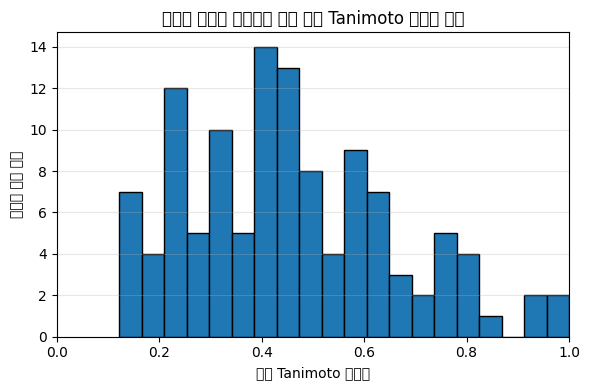

In [10]:
import matplotlib.font_manager as fm
# path = 'NanumGothic.ttf'
# fontprop = fm.FontProperties(fname=path)
# ---------------------------------------------
# 5) 각 생성 분자별로 “데이터셋 전체”와의 최대 Tanimoto 값을 계산
# ---------------------------------------------
max_sims_all = []
for fp_gen in gen_fps:
    sims = DataStructs.BulkTanimotoSimilarity(fp_gen, dataset_fps)
    # sims 리스트가 비어 있지 않다면 최대값을, 비어 있으면 0.0을 쓰기
    max_sims_all.append(max(sims) if sims else 0.0)

# 이제 max_sims_all에는 [각 생성 분자 j의, 데이터셋과의 최대 유사도]가 담겨 있음.
# 여기에는 1.0 (완전 동일)인 경우도 포함되어 있다.

# ---------------------------------------------
# 6) 히스토그램 그리기 (1.0 포함)
# ---------------------------------------------
plt.figure(figsize=(6, 4))
plt.hist(max_sims_all, bins=20, edgecolor='black')
plt.xlabel('최대 Tanimoto 유사도')
plt.ylabel('생성된 분자 개수')
plt.title('생성된 분자의 데이터셋 대비 최대 Tanimoto 유사도 분포')
plt.xlim(0.0, 1.0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [11]:
print(tgt.shape)
indices = (tgt[:, 0] > tgt[:, 1]) & (tgt[:, 0] > tgt[:, 2])
result_indices = torch.where(indices)[0]
print(result_indices)
torch.max(tgt[:,0])
torch.argmax(tgt[:,0])
print(tgt[164])
print(generated_smiles[338])
PS("*NC(COC(*)=O)NCC(F)(F)F")
#PS(valid_dataset_smiles[1259])

NameError: name 'tgt' is not defined

In [ ]:
import sascorer
from rdkit import Chem

sa_scores = 0
for smiles in generated_smiles:
    m = Chem.MolFromSmiles(smiles)
    sa_scores += sascorer.calculateScore(m)

print(sa_scores / len(generated_smiles))

print(sascorer.calculateScore(Chem.MolFromSmiles(generated_smiles[435])))

ModuleNotFoundError: No module named 'sascorer'